# Binary Classification using Neural Net

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split

### The objective of this notebook is to build a Neural net in python that will be able to distinguish between two different classes

 First we create a random dataset of 2000 observations using sklearn

In [7]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(2000, noise=0.20)

In [8]:
X.shape

(2000, 2)

The plot shows the non linearity in the data, and why using logistic regression is not a good option for this type of data

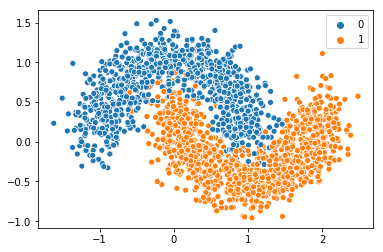

In [9]:
ax = sns.scatterplot(X[:,0], X[:,1], hue=y)

Splitting the data into train and test data respectively

In [36]:
#Train test plit data
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
#Reshaping the data

xTrain=xTrain.reshape(xTrain.shape[0],-1).T
xTest=xTest.reshape(xTest.shape[0],-1).T
yTrain=yTrain.reshape(1,yTrain.shape[0])
yTest=yTest.reshape(1,yTest.shape[0])
print ("xTrain shape: " + str(xTrain.shape))
print ("xTest shape: " + str(xTest.shape))
print ("yTrain shape: " + str(yTrain.shape)) 
print ("yTest shape: " + str(yTest.shape))

xTrain shape: (2, 1600)
xTest shape: (2, 400)
yTrain shape: (1, 1600)
yTest shape: (1, 400)


### The main steps for building a Neural Network are:

1.Define the model structure (such as number of input features)<br/>
2.Initialize the model's parameters<br/>
3.Loop:<br/>
3.aCalculate current loss (forward propagation)<br/>
3.bCalculate current gradient (backward propagation)<br/>
3.cUpdate parameters (gradient descent)<br/>

We need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions

In [12]:
#Gradient function: Sigmoid

def sigmoid(z):
    x=1/(1+np.exp(-z))
    return x

### Initializing parameters

In [13]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    """ 
    w = np.zeros(shape=(dim,1))
    b=0
    return w,b
   
    
    

"forward" and "backward" propagation steps for learning the parameters.


Forward Propagation:
- compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas : 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [14]:
# GRADED FUNCTION: propagate

def propagate(w,b,X,Y):
    m=X.shape[1]
    #Forward Propagation
    A=sigmoid(np.dot(w.T,X)+b)
    cost =(- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) 
    
    #Backward Propagation
    dw = 1/m*(np.dot(X,(A-Y).T))
    db = 1/m*np.sum(A-Y)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
    


### Optimization
- updating the parameters using gradient descent.

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [15]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
            grads, cost = propagate(w, b, X, Y)
            dw = grads["dw"]
            db = grads["db"]
            w = w-(learning_rate*dw)
            b = b-(learning_rate*db)
            if i % 100 == 0:
                costs.append(cost)
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

 We will use w and b to predict the labels for a dataset X.  There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`.

In [16]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        pass
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

##  Merge all functions into a model ##

    - Implement the model function. Use the following notation:
    - Y_prediction_test for  predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [17]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    y_train -- training labels represented by a numpy array 
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs =optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [42]:

d = model(xTrain, yTrain, xTest, yTest, num_iterations = 5000, learning_rate = 0.008, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.621429
Cost after iteration 200: 0.569361
Cost after iteration 300: 0.530260
Cost after iteration 400: 0.499994
Cost after iteration 500: 0.475957
Cost after iteration 600: 0.456454
Cost after iteration 700: 0.440339
Cost after iteration 800: 0.426816
Cost after iteration 900: 0.415313
Cost after iteration 1000: 0.405414
Cost after iteration 1100: 0.396805
Cost after iteration 1200: 0.389249
Cost after iteration 1300: 0.382563
Cost after iteration 1400: 0.376602
Cost after iteration 1500: 0.371252
Cost after iteration 1600: 0.366422
Cost after iteration 1700: 0.362036
Cost after iteration 1800: 0.358035
Cost after iteration 1900: 0.354367
Cost after iteration 2000: 0.350990
Cost after iteration 2100: 0.347871
Cost after iteration 2200: 0.344978
Cost after iteration 2300: 0.342287
Cost after iteration 2400: 0.339776
Cost after iteration 2500: 0.337427
Cost after iteration 2600: 0.335223
Cost after iteration 2700: 0.333152
Cost

### Based on the above findings we make the following conclusion

The Train and test set accuracy is very close which indicates no problem of overfitting in the model.<br>
1.The gradient descent function is implemented correctly as we see a decline in the cost function with the increase in the iterations<br>
2.The model accuracy is 80.75% on the test data set with 2000 epoch, which increases to 85% with 5000 epoch<br>